In [115]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [116]:
data=pd.read_csv('digit-recognizer/train.csv')

In [117]:
print(data.head())
print(data.shape)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [118]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [119]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)


def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            #print("Iteration: ", i)
            predictions = get_predictions(A2)
            #print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [124]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500) #training the weights

In [125]:
def make_predictions(X, W1, b1, W2, b2):
    W1, A1, W2, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) *255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


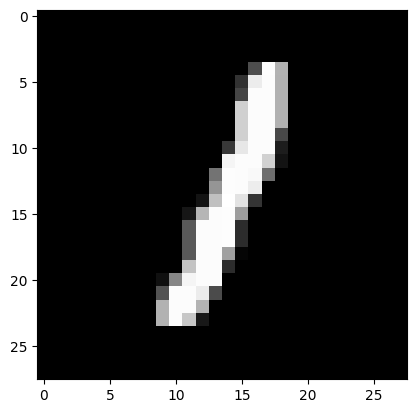

Prediction:  [7]
Label:  7


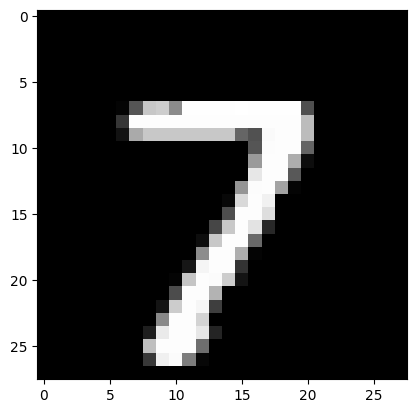

Prediction:  [9]
Label:  9


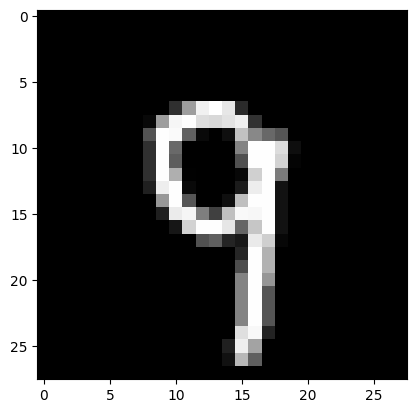

Prediction:  [0]
Label:  3


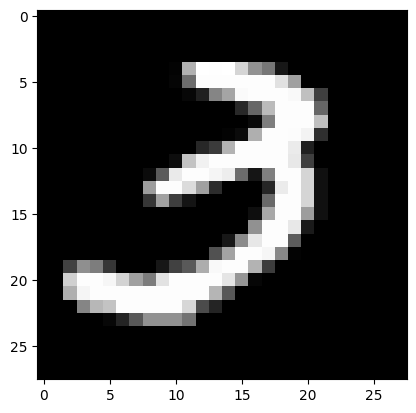

In [126]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(90, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(56, W1, b1, W2, b2)

In [127]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 2 6 9 2 0 2 2 6 4 6 3 6 0 5 7 0 7 7 7 9 4 9 8 6 4 1 9 6 6 4 7 6 7 8 9 6
 2 3 4 3 0 7 1 5 9 9 9 2 0 8 3 1 4 9 9 9 1 0 9 3 7 6 8 6 9 0 9 4 6 6 9 5 3
 7 8 4 6 5 7 4 6 6 4 1 9 8 5 2 3 5 1 3 6 8 4 4 8 1 9 9 5 4 3 0 4 6 4 4 8 6
 2 0 1 8 7 6 2 2 1 4 7 2 3 7 6 1 0 5 8 4 9 2 8 6 3 1 4 6 7 2 3 6 2 8 3 6 9
 9 4 7 6 9 3 7 1 9 8 1 0 3 0 4 6 2 4 5 0 3 0 9 1 7 9 6 5 9 4 7 0 6 8 6 0 4
 1 8 1 1 2 6 3 6 6 0 0 1 0 0 9 2 3 5 5 6 6 3 3 8 7 7 8 0 7 7 4 9 2 7 3 5 0
 7 4 5 3 3 8 7 6 7 5 7 1 6 4 3 6 4 6 4 7 8 1 9 3 2 0 8 2 9 7 4 8 5 2 4 6 2
 1 4 7 0 4 4 1 4 3 8 9 1 1 7 3 4 6 4 2 3 9 8 2 2 6 7 3 6 1 4 9 9 0 3 8 4 8
 6 8 9 1 7 1 6 7 7 4 1 8 1 3 4 4 1 3 8 2 0 9 6 3 8 7 4 7 3 1 3 6 8 9 1 7 3
 2 2 6 3 8 2 4 1 9 1 4 6 2 7 0 3 2 3 2 7 7 3 1 9 2 5 6 7 2 5 6 3 8 7 7 3 1
 4 8 1 5 2 9 8 4 6 3 9 9 0 5 2 7 8 8 4 3 8 3 0 1 3 2 2 6 4 5 8 8 1 9 7 1 8
 5 2 4 5 5 4 2 9 8 7 4 0 6 3 5 6 7 7 4 1 1 0 6 0 6 6 2 2 4 3 0 0 8 1 9 0 7
 9 6 2 0 8 7 8 0 3 2 9 7 0 1 9 0 2 2 2 1 4 3 2 8 2 0 6 6 5 6 4 7 5 3 9 2 5
 0 1 1 1 7 7 1 4 0 1 1 0 

np.float64(0.843)